In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_Raster = cwd + "\\Results"

In [3]:
df_Raster_5 = pd.read_csv(cwd_Raster + "\\2022 06Cropped Alpha Diversity.csv")
df_Raster_10 = pd.read_csv(cwd_Raster + "\\2022 06Cropped Alpha Diversity10.csv")
df_Raster_5.head()

,Plot,Raster 20Clusters Species Richness,Raster 20Clusters Shannon,Raster 20Clusters Simpson,Raster 35Clusters Species Richness,Raster 35Clusters Shannon,Raster 35Clusters Simpson,Raster 50Clusters Species Richness,Raster 50Clusters Shannon,Raster 50Clusters Simpson
0,FOR01,8.05,1.950667,0.84576,10.95,2.172363,0.86400,12.90,2.414920,0.89856
1,FOR02,4.85,1.193331,0.64176,8.35,1.830948,0.79808,9.85,2.074967,0.85056
2,FOR03,4.95,1.489291,0.75680,6.80,1.708687,0.79232,9.35,2.079390,0.85760
3,FOR04,3.00,0.797340,0.46224,5.10,1.347368,0.68304,8.10,1.865050,0.81488
4,FOR05,4.25,0.993256,0.53712,5.45,1.334504,0.66144,6.60,1.586574,0.74960


In [4]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [11]:
df_Raster_Shannon = pd.merge(df_Raster_5[['Plot','Raster 20Clusters Shannon']],df_Raster_10[['Plot','Raster 20Clusters Shannon']],on='Plot',suffixes=[' WindowSize 5', ' WindowSize 10'])
df_Raster_Shannon.columns = ['Plot','Raster Shannon WindowSize 5','Raster Shannon WindowSize 10']
df_Raster_Shannon.head()

,Plot,Raster Shannon WindowSize 5,Raster Shannon WindowSize 10
0,FOR01,1.950667,1.746033
1,FOR02,1.193331,1.411947
2,FOR03,1.489291,1.499673
3,FOR04,0.797340,1.379126
4,FOR05,0.993256,1.173735


In [12]:
df_Shannon = pd.merge(df_Field_Shannon,df_Raster_Shannon,on='Plot')
df_Shannon.describe()

,Field Shannon,Raster Shannon WindowSize 5,Raster Shannon WindowSize 10
count,96.000000,96.000000,96.000000
mean,0.890842,1.322535,1.539042
std,0.476653,0.351765,0.316908
min,0.000000,0.306179,0.497675
25%,0.545387,1.062143,1.358748
50%,0.930161,1.329013,1.558350
75%,1.264803,1.578306,1.735877
max,1.794190,2.107592,2.219368


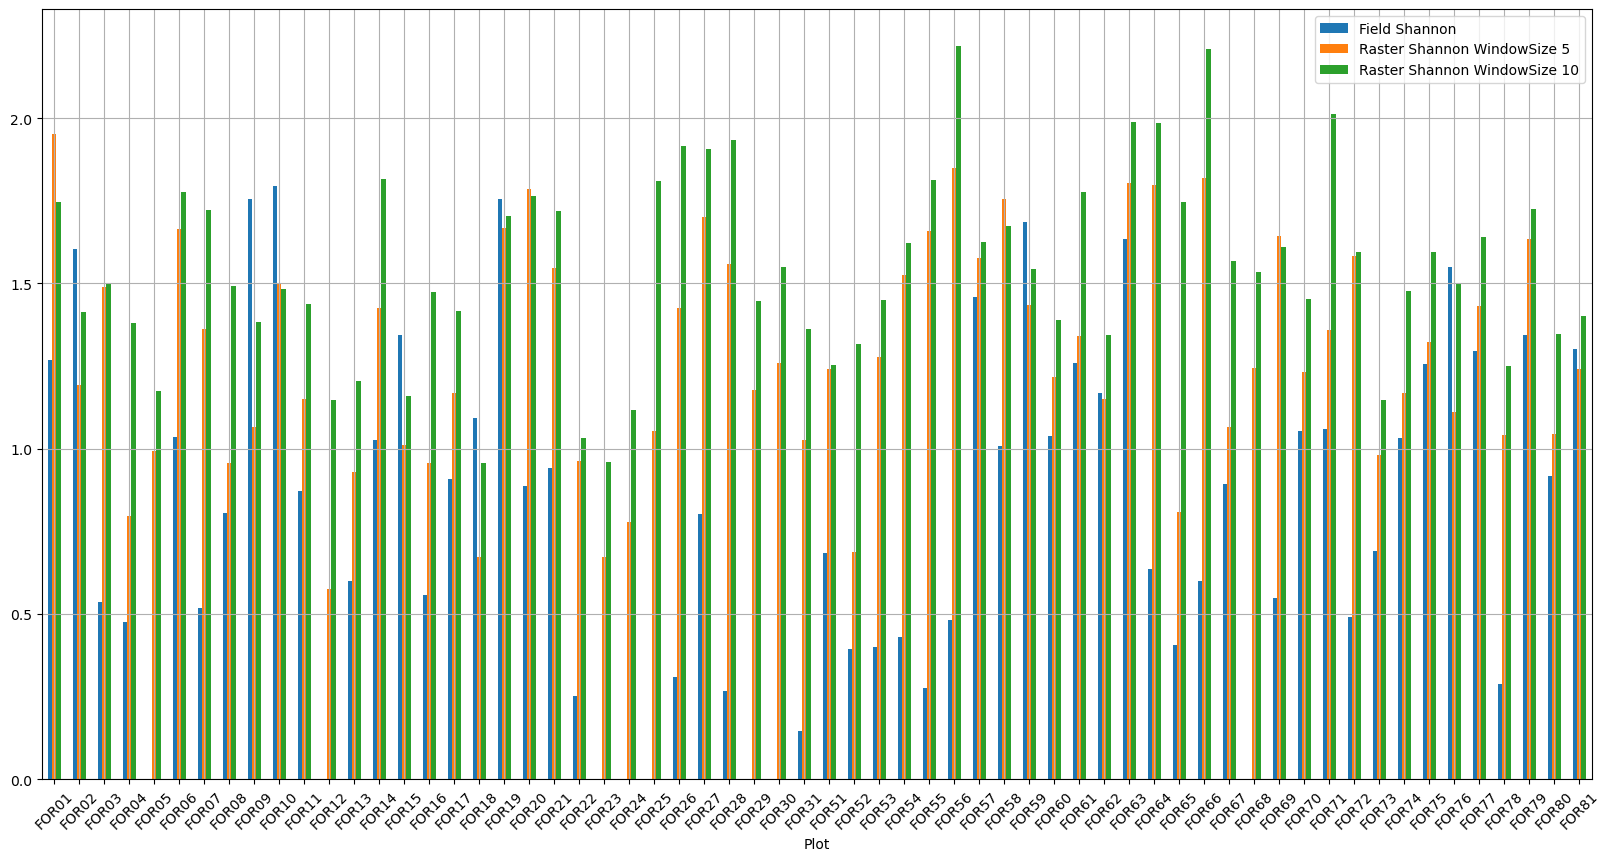

In [13]:
df_Shannon.iloc[0:62,:].plot(x = 'Plot', y = ['Field Shannon', 'Raster Shannon WindowSize 5','Raster Shannon WindowSize 10'], kind = 'bar', figsize=(20,10))
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [15]:
df_NoZero = df_Shannon.copy()
df_NoZero = df_NoZero[df_NoZero['Field Shannon']!=0]
df_NoZero.describe()

,Field Shannon,Raster Shannon WindowSize 5,Raster Shannon WindowSize 10
count,88.000000,88.000000,88.000000
mean,0.971828,1.354709,1.556914
std,0.410465,0.341910,0.315012
min,0.146145,0.306179,0.497675
25%,0.607716,1.136359,1.382515
50%,1.017380,1.361375,1.594996
75%,1.272701,1.610005,1.745316
max,1.794190,2.107592,2.219368


In [17]:
print(r2_score(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 5']))
print(r2_score(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 10']))

-1.3321545131192596
-2.6276307040232734


In [18]:
# Pearson correlation
print(stats.pearsonr(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 5']))
print(stats.pearsonr(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 10']))

PearsonRResult(statistic=0.14515462963799136, pvalue=0.1772213061779264)
PearsonRResult(statistic=0.010776338516304579, pvalue=0.9206234150732235)


In [19]:
print(mae(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 5']))
print(mae(df_NoZero['Field Shannon'],df_NoZero['Raster Shannon WindowSize 10']))

0.48849956211708834
0.6335052827408125
